In [21]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

In [22]:
datos = pd.read_csv('All_Diets.csv',sep=',')
datos.head()

,Diet_type,Recipe_name,Cuisine_type,Protein,Carbs,Fat,Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


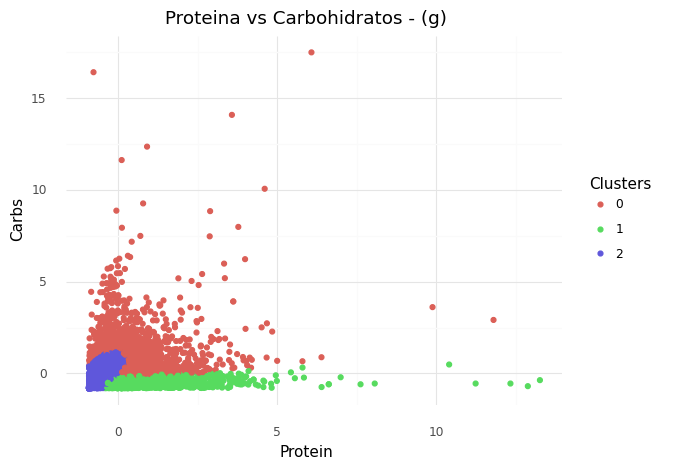

<ggplot: (110110147918)>

In [24]:
#GMM Simple
X = datos[['Protein','Carbs']]

z = StandardScaler()
X[['Protein','Carbs']] = z.fit_transform(X)

GMM = GaussianMixture(n_components = 3)
GMM.fit(X)

X['cluster'] = GMM.predict(X)
(ggplot(X, aes(x = 'Protein', y = 'Carbs', color = 'factor(cluster)')) + geom_point() + theme_minimal() + labs(title = 'Proteina vs Carbohidratos - (g)') + scale_color_discrete(name = 'Clusters'))

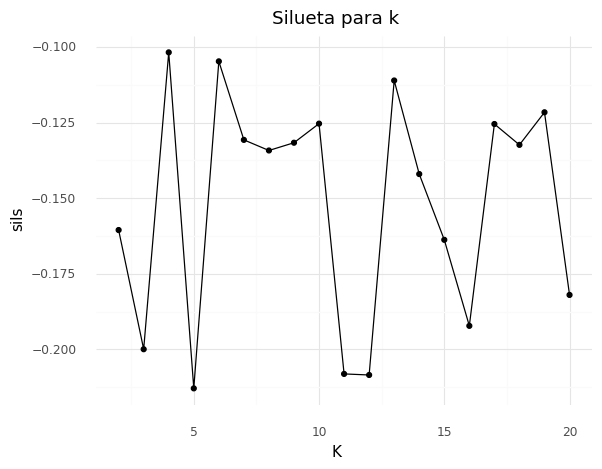

<ggplot: (110109435760)>

In [19]:
caracteristicas = ['Protein','Carbs']
X = datos[caracteristicas]

z = StandardScaler()
datos[caracteristicas] = z.fit_transform(X)

ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sils = []

for k in ks:
    GMM = GaussianMixture(n_components= k)
    GMM.fit(datos[caracteristicas])

    sils.append(silhouette_score(datos[caracteristicas], GMM.predict(X[caracteristicas])))
sil_df = pd.DataFrame({'K':ks,
                        'silhouette' : sils})

(ggplot(sil_df, aes(x = 'K', y ='sils')) + geom_point() + geom_line() + theme_minimal() + labs(title = 'Silueta para k'))

In [31]:
caracteristicas = ['Protein', 'Carbs', 'Fat']
X = datos[caracteristicas]

z = StandardScaler()
datos[caracteristicas] = z.fit_transform(X[caracteristicas])

#modelo
GMM = GaussianMixture(n_components = 3)
GMM.fit(X)

#prediccion
cluster = GMM.predict(X[caracteristicas])

#sombreado
silhouette_score(X[caracteristicas], cluster)

#probabilidades
GMM.predict_proba(X[caracteristicas])

X['cluster'] = cluster

(ggplot(X, aes(x = "Protein", y = "Carbs", color = "factor(cluster)")) + geom_point() + theme_minimal() + labs(title = "Cluster Membership") + scale_color_discrete(name ="Cluster"))


TypeError: ggplot.__init__() got an unexpected keyword argument 'color'